In [47]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict

import sys
sys.path.append('../..')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

# Machine learning imports
# import sklearn
# import tensorflow as tf
# import keras
import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad

# Internal Imports
from src.utils import dictmap_load

In [48]:
dict_dataframes_index = dictmap_load(path = "../../data/interim/clean_data_index.xlsx")   
#dict_dataframes_index['csi300 index data'].info()

In [49]:
data = dict_dataframes_index['csi300 index data'].drop(['date'],axis=1,inplace=True)
data = dict_dataframes_index['csi300 index data']
data.head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [50]:
len(dict_dataframes_index['csi300 index data'].columns)

19

In [51]:
# Multi-level wavelet transform
    # https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html#pywt.wavedec
w = pywt.Wavelet('haar')
coeffs = wavedec(data, w, level=2,axis=1)
cA2, cD2, cD1 = coeffs
# cA = Approximation coefficients
    # Approximation (low pass)
# cD = Detail coefficient(s)
    # Detail (high pass)
    # Detail cofficients represent the high freq part of the signal  

In [52]:
print(len(cA2),len(cD2),len(cD1))

2010 2010 2010


In [53]:
pd.DataFrame(cA2).head(5)

,0,1,2,3,4
0,5498.555,144188.806018,3098.737421,2665.1063,-8.726279e+07
1,5409.115,139512.315776,3039.246487,2607.2290,-1.095493e+08
2,5420.015,228235.707397,3083.148915,2641.5633,-5.855737e+07
3,5496.465,189462.307019,3007.648359,2530.0121,-7.467504e+07
4,5634.485,263606.565496,3083.225194,2876.2001,-3.531151e+07


In [54]:
pd.DataFrame(cD1).head(2)

,0,1,2,3,4,5,6,7,8,9
0,-7.198347,-5.777062,203960.361910,152.437489,-175.467877,98.802257,2080.905231,2214.726462,-6.594957,0.0
1,-30.624795,-20.887934,197347.605359,153.057540,-152.448466,97.926587,2103.218976,2156.663803,-6.032495,0.0


In [55]:
pd.DataFrame(cD2).head(2)

,0,1,2,3,4
0,110.025,144399.383982,-3108.486472,94.5501,8.726278e+07
1,39.455,139723.324224,-3103.091175,62.5358,1.095493e+08


In [56]:
#plt.plot(cA2);

In [57]:
#plt.plot(cD1);

In [58]:
#plt.plot(cD2);

In [59]:
#plt.plot(data);

In [61]:
reconstructed_signal = pywt.waverec(coeffs, 'haar',axis=1)
len(reconstructed_signal)

2010

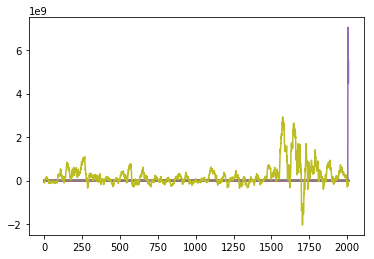

In [63]:
plt.plot(data);

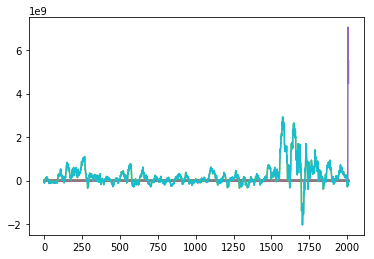

In [62]:
plt.plot(reconstructed_signal);

In [82]:
pd.DataFrame(reconstructed_signal).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [83]:
data.head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [84]:
# http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/
def waveletSmooth( x, wavelet="haar", level=1, declevel=3):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode="per",level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="soft" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode="per",axis=0 )
    f, ax = plt.subplots(figsize=(8,6))
    plt.plot( x, color="b", alpha=0.5)
    plt.plot( y, color="r")
    ax.set_xlim((0,len(y)))
    return y

In [85]:
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

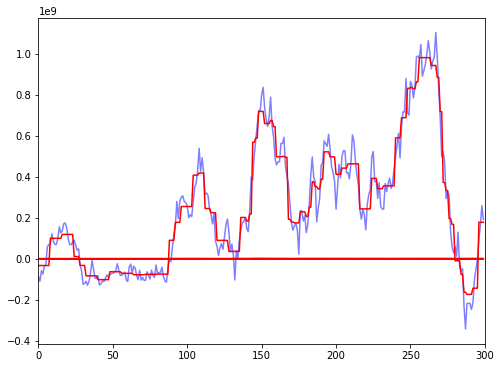

In [86]:
waveletSmooth(data[:300]);

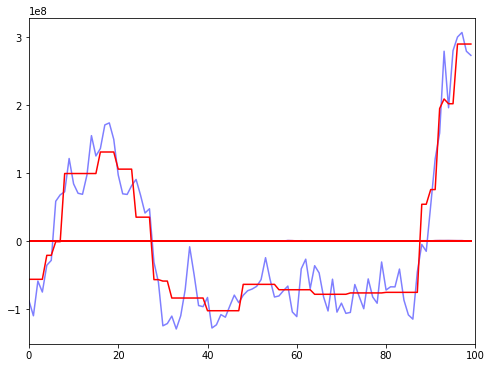

In [87]:
waveletSmooth(data[:100]);

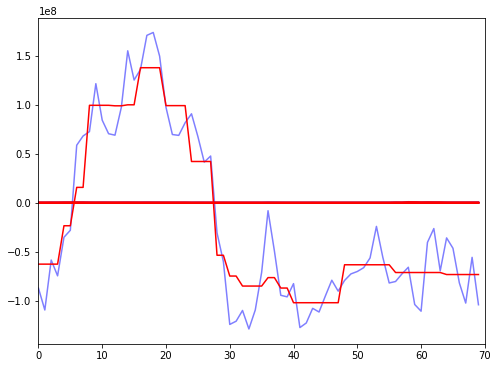

In [88]:
waveletSmooth(data[:70]);

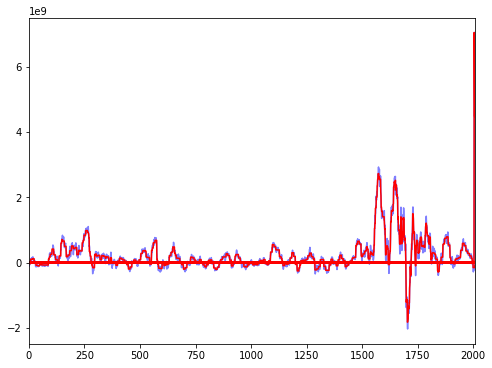

In [89]:
denoised_data = waveletSmooth(data);

In [90]:
# print(w)
# w.filter_bank == (w.dec_lo, w.dec_hi, w.rec_lo, w.rec_hi)
# print(w.filter_bank)
# # https://pywavelets.readthedocs.io/en/latest/ref/other-functions.html#pywt.orthogonal_filter_bank
# #print(pywt.orthogonal_filter_bank([2,2]))